In [554]:
#Import Dependecies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as py
import seaborn as sns

In [555]:
#read in csv test headers
samsung_data = pd.read_csv("Resources/samsung_data.csv")
samsung_data.head()

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,2017-10-06,5464,200,181,5,0,66
1,2017-10-07,6041,100,197,8,0,66
2,2017-10-08,25,100,0,5,0,66
3,2017-10-09,5461,100,174,4,0,66
4,2017-10-10,6915,200,223,5,500,66


In [556]:
#Rename Columns
samsung_data  = samsung_data.rename(columns={"date" : "Date", "step_count": "Step Count", "mood": "Mood", "calories_burned" : "Calories Burned", "hours_of_sleep" : "Total Sleep(Hours)", "bool_of_active" : "Active", "weight_kg" : "Weight (KGs)"})
print(samsung_data)

          Date  Step Count  Mood  Calories Burned  Total Sleep(Hours)  Active  \
0   2017-10-06        5464   200              181                   5       0   
1   2017-10-07        6041   100              197                   8       0   
2   2017-10-08          25   100                0                   5       0   
3   2017-10-09        5461   100              174                   4       0   
4   2017-10-10        6915   200              223                   5     500   
..         ...         ...   ...              ...                 ...     ...   
91  2018-01-05         133   100                4                   2       0   
92  2018-01-06         153   300                0                   8       0   
93  2018-01-07         500   200                0                   5     500   
94  2018-01-08        2127   200                0                   5       0   
95  2018-01-09        2203   300                0                   5     500   

    Weight (KGs)  
0       

In [557]:
samsung_data.head()


,Date,Step Count,Mood,Calories Burned,Total Sleep(Hours),Active,Weight (KGs)
0,2017-10-06,5464,200,181,5,0,66
1,2017-10-07,6041,100,197,8,0,66
2,2017-10-08,25,100,0,5,0,66
3,2017-10-09,5461,100,174,4,0,66
4,2017-10-10,6915,200,223,5,500,66


In [558]:
samsung_data_copy_a = samsung_data.copy()
samsung_data_copy_b = samsung_data.copy()
samsung_data_copy_c = samsung_data.copy()
samsung_data_copy_d = samsung_data.copy()
samsung_data_copy_e = samsung_data.copy()

# Does an Active Day Increase or Decrease Sleep? 


## Define Thresholds and Create Boolean Columns

In [559]:
#Define Activity Threshold
activity_threshold = 3000

In [560]:
#Compare Boolean to "Step Count" ultilizing activity threshold
samsung_data_copy_a["Active"] = samsung_data_copy_a["Step Count"] > activity_threshold

In [561]:
#Display Header
samsung_data_copy_a.head()

,Date,Step Count,Mood,Calories Burned,Total Sleep(Hours),Active,Weight (KGs)
0,2017-10-06,5464,200,181,5,True,66
1,2017-10-07,6041,100,197,8,True,66
2,2017-10-08,25,100,0,5,False,66
3,2017-10-09,5461,100,174,4,True,66
4,2017-10-10,6915,200,223,5,True,66


In [562]:
#Locate Key Value (Mean) for Column "Step Count"
samsung_data_copy_a['Step Count'].mean()

2935.9375

In [563]:
#Locate Mean for "Total Sleep(Hours)" against value for Active boolean
avg_sleep = samsung_data_copy_a.groupby("Active")["Total Sleep(Hours)"].mean().reset_index()
avg_sleep["Active"] = avg_sleep["Active"].map({True: "Active", False: "Inactive"})

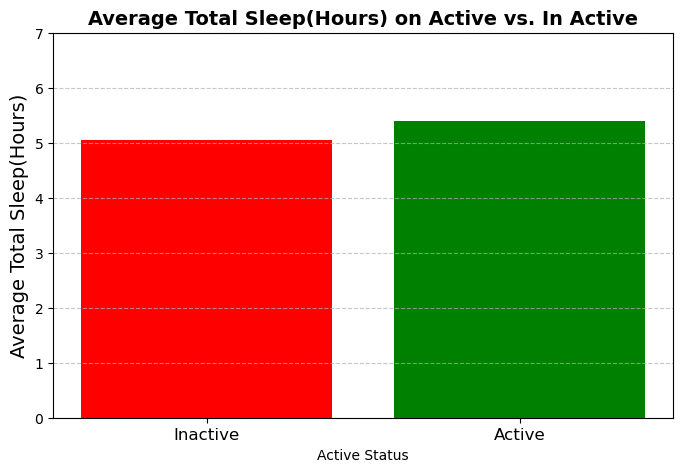

In [564]:
# Plotting the data
plt.figure(figsize=(8, 5))

#create a bar
plt.bar(avg_sleep['Active'],avg_sleep['Total Sleep(Hours)'], color=['red','green'])

# Give our chart Labels, Title, Ticks and Limiters
plt.title('Average Total Sleep(Hours) on Active vs. In Active', fontsize=14, fontweight='bold')
plt.xlabel('Active Status')
plt.ylabel('Average Total Sleep(Hours)', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Inactive', 'Active'],fontsize=12)
plt.ylim(0,7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
#Export Figure to Image Cache as PNG filetype
plt.savefig("Images/Active_Day_For_Mood.png")
# Show the figure
plt.show()


# Visual analysis (Bar Chart)
This Bar Chart visualizes the average Sleeping Hours obtained when the user has gone Above (Active) or Below (Inactive) the Step Threshold of 3000. As shown above when the user has an Active Day they on average obtain an extra half an hour of Sleep. This suggests a slightly positive correlation between Activity and Sleep.

In [565]:
# Create the trendline data
x = samsung_data_copy_a["Step Count"]

In [566]:
slope, intercept, r_value, p_value, std_err = st.linregress(x, samsung_data.index) 

In [567]:
trendline = slope * x + intercept

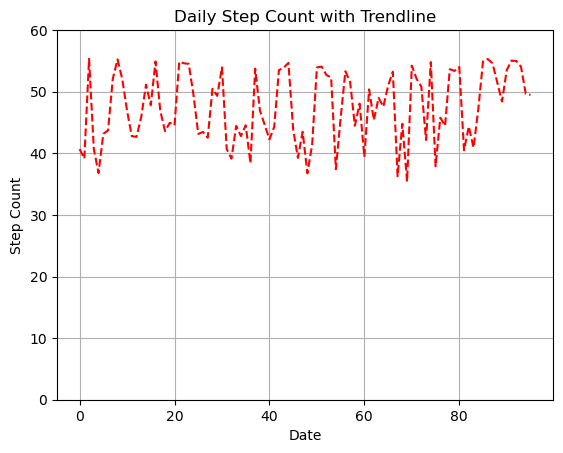

Slope of the trendline: -0.002692496114533029
R-squared value: 0.04291890669621571


In [568]:
# Plot the trendline
plt.plot(samsung_data_copy_a.index, trendline, color='red', linestyle='--', label='Trendline')

# Adding Titles, Labels, and Limiters
plt.title('Daily Step Count with Trendline')
plt.xlabel('Date')
plt.ylabel('Step Count')
plt.grid()
plt.ylim(0, 60)
#Export Figure to Image Cache as PNG filetype
plt.savefig("Images/Daily_Step_count_with_Trendline.jpg")
# Show the plot
plt.show()


# Deriving results
print(f"Slope of the trendline: {slope}")
print(f"R-squared value: {r_value**2}")

# Visual Analysis (Step Trendline)
The Trendline visually represents the amount of steps taken over the course of the user study, this data slopes negatively, showing a slight decrease in the steps taken per day over time, with an R Squared value of .04 confirming a low correlation between time and steps taken.

# Does an Active Day Improve Mood?

In [569]:
#convert boolean values to text and display header
samsung_data_copy_b.loc[samsung_data_copy_b['Active'] == 0, 'Active'] = f'Inactive'
samsung_data_copy_b.loc[samsung_data_copy_b['Active'] == 500, 'Active'] = f'Active'
samsung_data_copy_b.head()

C:\Users\poper\AppData\Local\Temp\ipykernel_34388\1983491697.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Inactive' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  samsung_data_copy_b.loc[samsung_data_copy_b['Active'] == 0, 'Active'] = f'Inactive'


,Date,Step Count,Mood,Calories Burned,Total Sleep(Hours),Active,Weight (KGs)
0,2017-10-06,5464,200,181,5,Inactive,66
1,2017-10-07,6041,100,197,8,Inactive,66
2,2017-10-08,25,100,0,5,Inactive,66
3,2017-10-09,5461,100,174,4,Inactive,66
4,2017-10-10,6915,200,223,5,Active,66


# Visualizations

## Pie Chart

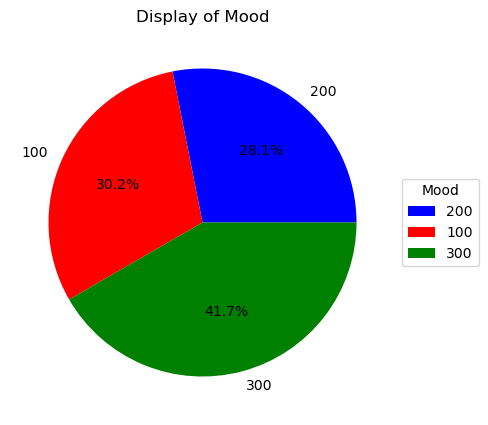

In [570]:
mood_agg = samsung_data_copy_b["Mood"].value_counts().sort_values(ascending=True)
colors=['blue','red','green']
plt.figure(figsize=(10, 5))
plt.pie(mood_agg, labels=mood_agg.index, autopct="%1.1f%%", colors=colors)
plt.legend([200, 100, 300], title="Mood", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Display of Mood")
#Export Figure to Image Cache as PNG filetype
plt.savefig("Images/Display_Of_Mood.png")
plt.show()


# Visual Analysis (Pie Chart)
The Pie Chart represents a holistic view of Mood inputs over the course of 4 months. Distribution is relatively evenly spread amongst Neutral(28.1%) and Negative(30.2%) while a more significant portion of time was spent holding a Positive Mood State(41.7%). This visualization provides a solid view that we will utilize when drilling down the dataset 

## Histogram


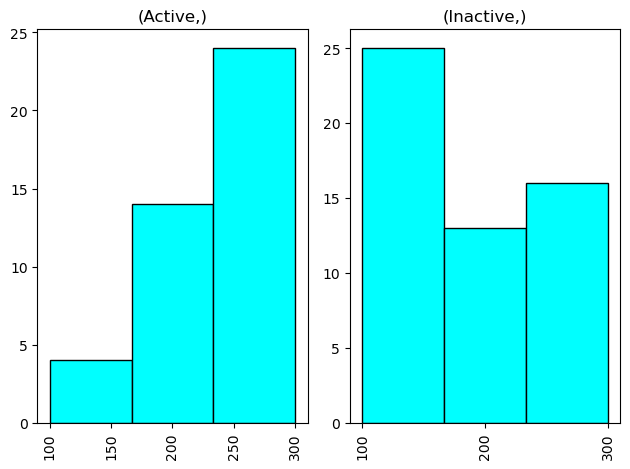

In [571]:
#Create Histogram
#Set Values and Formatting
samsung_data_copy_b.hist(column=['Mood'], by=['Active'], bins=(3), color='cyan',  align='mid', edgecolor='black')
#Set Ticks and Layout
plt.xticks(py.arange(100, 310, 100))
plt.yticks(py.arange(0, 30, 5))
plt.tight_layout()

#Export Figure to Image Cache as PNG filetype
plt.savefig("Images/Boolean_Histogram.png")
#Show Plot
plt.show()

In [572]:
#Create a Group to Display Values Numerically
counts = samsung_data_copy_b.groupby(['Mood', 'Active']).size()
#Display Results
display(counts)


Mood  Active  
100   Active       4
      Inactive    25
200   Active      14
      Inactive    13
300   Active      24
      Inactive    16
dtype: int64

# Visual Analysis (Histogram)
The Histogram represents the spread of Mood Placement by Daily Activity with the views being inverted to show a significant output of the Positive Mood Value (300), equal levels of the Neutral Mood (200) output, and a significant drop in the Negative Mood output(100) when the user reports an Active Day, resulting in a stance that an Active day somewhat improves mood.

# Does an Active Day Result in an Increased Number of Calories Burned? 


In [573]:
samsung_data_copy_c.loc[samsung_data_copy_c['Active'] == 0, 'Active'] = f'Inactive'
samsung_data_copy_c.loc[samsung_data_copy_c['Active'] == 500, 'Active'] = f'Active'

C:\Users\poper\AppData\Local\Temp\ipykernel_34388\4008338697.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Inactive' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  samsung_data_copy_c.loc[samsung_data_copy_c['Active'] == 0, 'Active'] = f'Inactive'


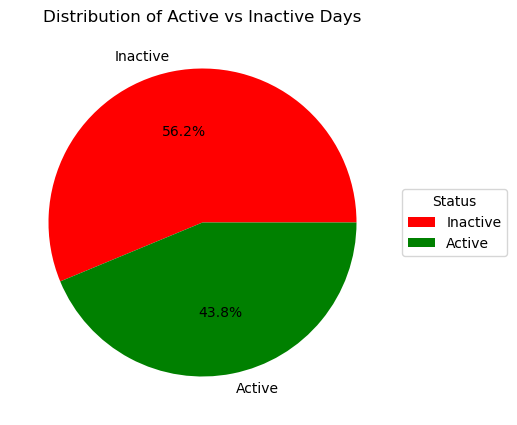

In [574]:
#### Create a pie chart to see the distribution of active vs inactive days
active_counts = samsung_data_copy_c["Active"].value_counts().sort_values(ascending=False)
colors=['red','green']
plt.figure(figsize=(10, 5))
plt.pie(active_counts, labels=active_counts.index, autopct="%1.1f%%", colors=colors)
plt.legend(active_counts.index, title="Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Distribution of Active vs Inactive Days")
#Export Figure to Image Cache as PNG filetype
plt.savefig("Images/Active_vs_Inactive_Day.png")
plt.show()

# Visual Analysis (Pie Chart)
The visualization of this Pie Chart represents the percentage of days the user was active vs inactive over the course of the study. The input of an Inactive(Red) State was used as the majority of the input at 56.2% comparable to the Active(Green) input's minority at 43.8%. The conclusion is that the user viewed themselves as inactive the majority of the study with the boolean not utilizing the additional data to determine a result

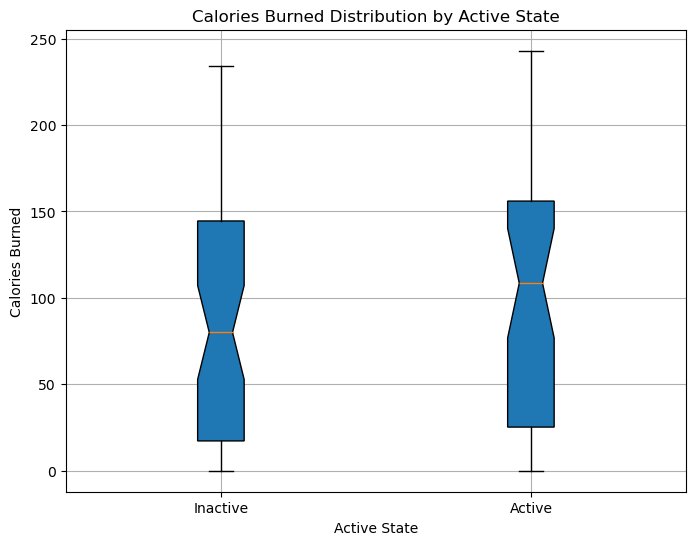

In [575]:
#### Box plot for Calories Burned based on Active state
plt.figure(figsize=(8, 6))
plt.boxplot(
    [samsung_data_copy_d[samsung_data_copy_d["Active"] == 0]["Calories Burned"],
     samsung_data_copy_d[samsung_data_copy_d["Active"] == 500]["Calories Burned"]],
    labels=["Inactive", "Active"],
    notch=True,
    vert=True,
    patch_artist=True,
)
plt.xlabel("Active State")
plt.ylabel("Calories Burned")
plt.title("Calories Burned Distribution by Active State")
plt.grid(True)
#Export Figure to Image Cache as PNG filetype
plt.savefig("Images/box_and_whisker.png")
plt.show()

# Visual Analysis(Box plot)
The visualization of this box plot shows the distribution of calories the subject burned on active and inactive days. The outliers and medians are represented here showing a positive correlation in favor of an Active State on average resulting in more caloric burn (about 50 per day). We can conclude that an "Active" State will on average deliver higher caloric burn per day.

## Histogram

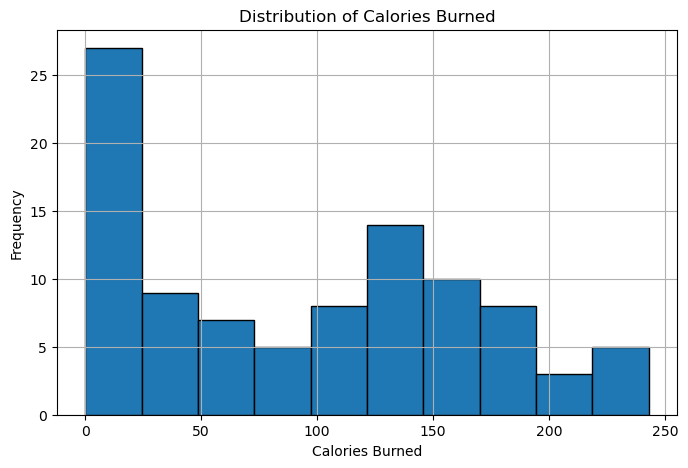

In [576]:
# Create a histogram for Calories Burned
plt.figure(figsize=(8, 5))
plt.hist(samsung_data_copy_d["Calories Burned"], bins=10, edgecolor="black")  # Adjust bins as needed
plt.xlabel("Calories Burned")
plt.ylabel("Frequency")
plt.title("Distribution of Calories Burned")
plt.grid(True)
#Export Figure to Image Cache as PNG filetype
plt.savefig("Images/Calories_Burned_Histogram.png")
plt.show()

# Visual Analysis (Histogram) 
The Histogram represents how many times the subject burned/didn't burn the same amount of calories. We can take away that the user was inconsistent with Activity as the majority of the set falls between 0-50 calories and between 100-200 calories so we can infer no regiment was implemented resulting in the need for more data to draw additional conclusions

# Key Values

In [577]:
#Calculating mean and converting to an integer
mean_calories = int(samsung_data_copy_d['Calories Burned'].mean())

print("Mean Calories Burned (no decimal places):",mean_calories)

Mean Calories Burned (no decimal places): 93


In [578]:
mode_calories = samsung_data_copy_d['Calories Burned'].mode()
median_calories = samsung_data_copy_d['Calories Burned'].median() 

print("Mode Calories Burned:", mode_calories)
print("Median Calories Burned:", median_calories)

Mode Calories Burned: 0    0
Name: Calories Burned, dtype: int64
Median Calories Burned: 96.0


In [579]:
#Calculating total calories burned
total_calories_burned = samsung_data_copy_d['Calories Burned'].sum()

print("Total Calories Burned:", total_calories_burned)

Total Calories Burned: 8971


# Does Consistency in Activity Result in Longer Stretches of Positive Moods?

## Define Thresholds and Create Boolean Columns

In [580]:
# Define the thresholds for activity and positive mood
step_threshold = 3000
positive_mood_threshold = 200

# Create boolean columns for activity and positive mood
samsung_data_copy_e['Is Active'] = samsung_data_copy_e['Step Count'] > step_threshold
samsung_data_copy_e['Positive Mood'] = samsung_data_copy_e['Mood'] > positive_mood_threshold

In [581]:
# Filter data for Positive Mood
filtered_data = samsung_data_copy_e[samsung_data_copy_e['Positive Mood'] == 1]

# Display the filtered data
filtered_data.head()

,Date,Step Count,Mood,Calories Burned,Total Sleep(Hours),Active,Weight (KGs),Is Active,Positive Mood
12,2017-10-18,4732,300,150,6,500,65,True,True
23,2017-10-29,330,300,10,6,0,64,False,True
25,2017-10-31,4550,300,150,8,500,64,True,True
26,2017-11-01,4435,300,141,5,0,64,True,True
27,2017-11-02,4779,300,156,4,0,64,True,True


# Count Consecutive Days Meeting the Activity Threshold

##  Identify Activity Streaks

In [582]:
# Create streak IDs based on changes in 'Is Active'
samsung_data_copy_e['astreak_ID'] = (samsung_data_copy_e['Is Active'] != samsung_data_copy_e['Is Active'].shift()).cumsum()

# Count the length of each streak
samsung_data_copy_e['Streak Length'] = samsung_data_copy_e.groupby('astreak_ID').cumcount() + 1

# Display the relevant columns
active_data = samsung_data_copy_e[['Is Active', 'Streak Length', 'astreak_ID', 'Positive Mood']]

# Group the active data by 'astreak_ID' and apply aggregation functions
agg_functions = {'Is Active': 'first', 'Streak Length': 'last', 'Positive Mood': 'sum'}
result = active_data.groupby(active_data['astreak_ID']).aggregate(agg_functions)
result.index.name = None

#display(result)
display(result)

,Is Active,Streak Length,Positive Mood
1,True,2,0
2,False,1,0
3,True,4,0
4,False,3,0
5,True,4,1
6,False,3,0
7,True,4,0
8,False,4,1
9,True,3,3
10,False,3,3


### Filtering the Result To Find True Values:

In [583]:
#Filtering based on when Is Active is true
true_results = result[result['Is Active'] == True]
display(true_results)

,Is Active,Streak Length,Positive Mood
1,True,2,0
3,True,4,0
5,True,4,1
7,True,4,0
9,True,3,3
11,True,6,5
13,True,4,4
15,True,5,5
17,True,2,1
19,True,1,1


# Summary Statistics:

In [584]:
# Calculate mean and count of streak lengths
mean_streak_length = result['Streak Length'].mean()
count_streak_length = result['Streak Length'].count()

# Prepare a summary DataFrame with formatted values
summary_data = {
    'Statistic': ['Mean Streak Length', 'Count of Streak Lengths'],
    'Value': [f"{mean_streak_length:.0f}", f"{count_streak_length:.0f}"]  # Format to remove decimals
}

# Create a DataFrame
summary_df = pd.DataFrame(summary_data)

# Display the summary statistics as a table without index
display(summary_df.style.hide(axis='index'))  # Hide the index using .style

# summary statistics :
summary_stats = result.describe()

# Displaying summary statistics as integers (rounded)
summary_stats_int = summary_stats.round(2).astype(int)

# Convert the summary statistics DataFrame to a more user-friendly format
summary_stats_table = summary_stats_int.reset_index()

# Display the summary statistics table
display(summary_stats_table.style.hide(axis='index'))  # Hide the index using .style

Statistic,Value
Mean Streak Length,3
Count of Streak Lengths,32


index,Streak Length,Positive Mood
count,32,32
mean,3,1
std,2,1
min,1,0
25%,1,0
50%,3,1
75%,4,2
max,11,5


# Visualizations:

##  Relationships Between Activity Consistency and Positive Mood

## Bar Graph

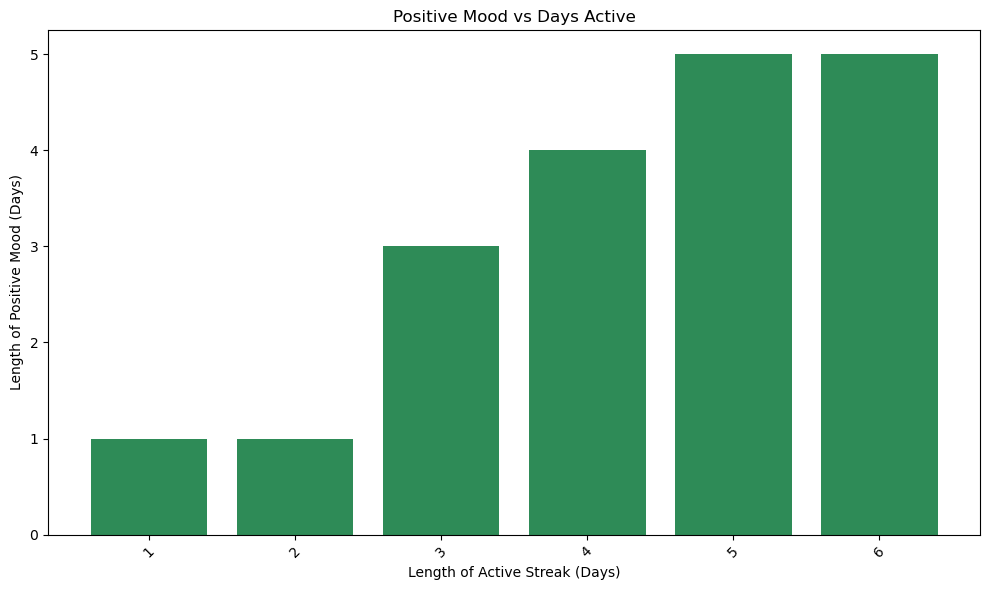

In [585]:
# Create a new figure with a specified size (width, height in inches)
plt.figure(figsize=(10, 6))

# Create a bar plot using the range of indices for the x-axis
# 'result['Positive Mood']' contains the heights of the bars
plt.bar(true_results['Streak Length'], true_results['Positive Mood'], color='seagreen', width=0.8)  # Set bar color and width

# Set the label for the x-axis
plt.xlabel('Length of Active Streak (Days)')

# Set the label for the y-axis
plt.ylabel('Length of Positive Mood (Days)')

# Set the title of the plot
plt.title('Positive Mood vs Days Active')

# Rotate x-tick labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Adjust the layout to make sure everything fits well
plt.tight_layout()

# Save the figure to a file in PNG format
# You can specify a different filename or format (e.g., .jpg, .pdf)
plt.savefig('Images/total_positive_mood.png')

# Display the plot on the screen
plt.show()

# Visual Analysis (Bar Graph)
The bar graph visually represents the relationship between Streak Length (in days) and Positive Mood ratings for the user. Each bar corresponds to a specific streak length, with the height indicating the average positive mood rating for that duration.
The x-axis displays the streak lengths, ranging from 1 to 6 days, while the y-axis shows the associated mood ratings.
The graph reveals that shorter streak lengths, particularly 1 day, correspond to lower mood ratings, often at 0 or 1. As the streak length increases, the mood ratings generally rise. 3-day streaks exhibit varied mood ratings, suggesting a moderate improvement in emotional well-being.
Notably, 4-day streaks show significant positive mood ratings, ranging from 2 to 4, indicating a strong correlation with enhanced emotional health. The 5-day and 6-day streaks both reach a mood rating of 5, emphasizing that sustained activity significantly boosts mood.
Overall, the bar graph effectively illustrates that longer activity streaks are associated with higher positive mood ratings, underscoring the benefits of consistent engagement for improving emotional well-being.

## Histogram

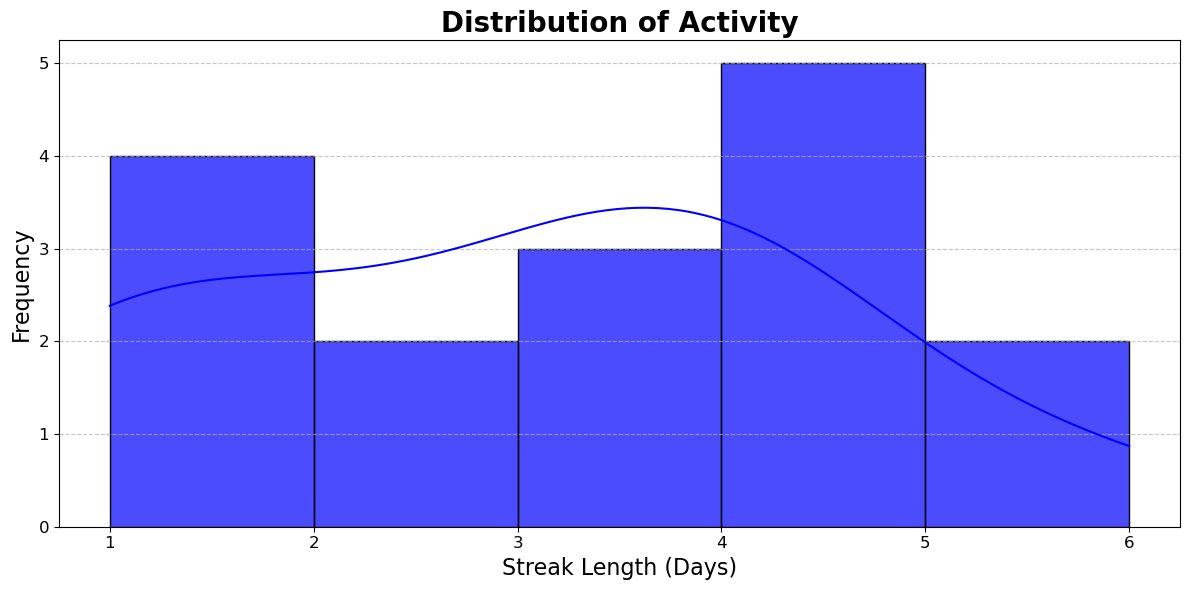

In [586]:
# Histogram based on Streak Length
plt.figure(figsize=(12, 6))

# Create the histogram with KDE and adjust the settings
sns.histplot(
    true_results['Streak Length'], 
    bins=15,  # Number of bins
    kde=True, 
    color='blue', 
    alpha=0.7,
    edgecolor='black',  # Edge color for better definition
    binwidth=1  # Adjust this value as needed for bar width
)

# Customize the plot with additional features
plt.title('Distribution of Activity', fontsize=20, fontweight='bold')
plt.xlabel('Streak Length (Days)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# Save the figure
plt.savefig('Images/Distribution of Activity.png')
plt.show()

# Visual Analysis (Histogram)
The dataset includes activity streak lengths and corresponding mood ratings for a single user. The histogram visualizes the distribution of these streak lengths, with the x-axis showing the length of active streaks in days and the y-axis displaying their frequency. The most common streak lengths are 1 day (4 occurrences), 3 days (3 occurrences), and 4 days (5 occurrences), indicating that the user frequently engages in activity for about 4 days.The KDE curve emphasizes that the peak streak length is around 4 days, suggesting the user tends to maintain activity over moderate periods. When examining the relationship between streak lengths and mood ratings, longer streaks, particularly 4 days, are associated with higher positive mood ratings, while shorter streaks correspond with lower ratings. This suggests that sustained activity positively influences the user’s emotional well-being.Overall, the histogram illustrates that the user’s most common streak length is about 4 days, which correlates with improved mood

## Line Chart

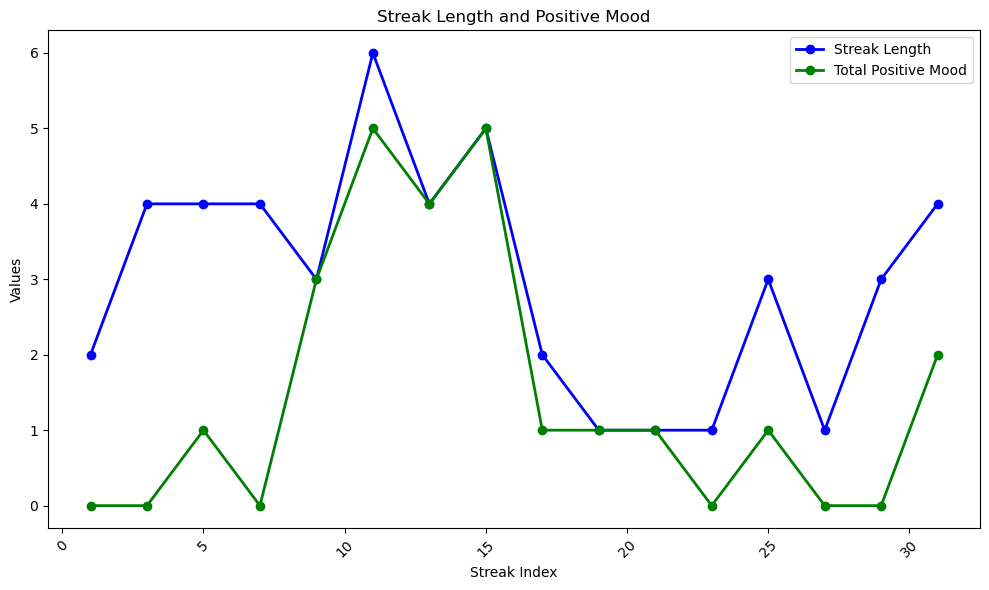

In [587]:
# Line Chart based on streak length and positive mood
plt.figure(figsize=(10, 6))

# Plot Streak Length
plt.plot(true_results.index, true_results['Streak Length'], marker='o', color='blue', linestyle='-', linewidth=2, label='Streak Length')

# Plot Positive Mood
plt.plot(true_results.index, true_results['Positive Mood'], marker='o', color='green', linestyle='-', linewidth=2, label='Total Positive Mood')

# Adding labels and title
plt.xlabel('Streak Index')
plt.ylabel('Values')
plt.title('Streak Length and Positive Mood')
plt.xticks(rotation=45)

# Adding a legend
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
# Save the figure
plt.savefig('Images/Streak Length and Positive Mood.png')
plt.show()

# Visual Analysis (Line Chart)
The line chart visualizes the relationship between Streak Length (in days) and Positive Mood ratings based on the provided dataset. The x-axis represents the index of each record, while the y-axis displays the values for both Streak Length and Positive Mood.
The blue line indicates Streak Length, showcasing how activity streaks vary over time. Each point is marked for clarity, making it easy to see the individual streak lengths at each index. The green line represents Positive Mood, showing the mood ratings associated with each streak length.
Key observations include that short streaks at lower indices typically show lengths of 1 to 3 days, correlating with low mood ratings, often at 0 or 1. This suggests that brief activity periods have minimal emotional impact. As the x-axis progresses, streak lengths increase, particularly around 4-day and 5-day streaks, where mood ratings begin to rise, indicating improved emotional well-being.
The highest mood ratings correspond to the 5-day and 6-day streaks, reinforcing the idea that sustained activity significantly enhances positive mood. The chart effectively illustrates the positive correlation between streak length and mood, demonstrating that longer activity durations are associated with better mood ratings. This visualization underscores the potential benefits of maintaining longer activity streaks to enhance emotional health.

# Analyze Correlation and Visualize Results (Heat Map)

,Positive Mood,Is Active,Streak Length
Positive Mood,1.000000,0.171499,0.424717
Is Active,0.171499,1.000000,0.000000
Streak Length,0.424717,0.000000,1.000000


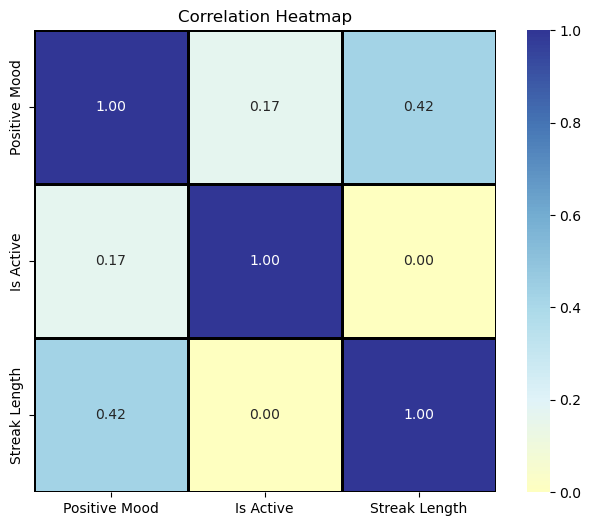

In [588]:
# Convert boolean columns to numeric 
result['Positive Mood'] = result['Positive Mood'].astype(int)
result['Is Active'] = result['Is Active'].astype(int)

# Select relevant columns for correlation
correlation_data = result[['Positive Mood', 'Is Active', 'Streak Length']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()
display(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu', center=0, linewidth=1, linecolor='black', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.savefig('Images/Correlation Heatmap.png')
plt.show()

# Visual Analysis (HEAT MAP)
The correlation matrix reflects the relationships among Positive Mood, Is Active, and Streak Length for a single user. The diagonal values (1.0) indicate perfect correlation for each variable with itself. In the heatmap, this correlation is represented with a strong color darker blue. The moderate positive correlation between Positive Mood and Streak Length (0.42) suggests that this user tends to report higher positive mood ratings when maintaining longer activity streaks. In the heatmap, this correlation is represented with a strong color intensity in a blueish hue, indicating the benefits of encouraging longer activity streaks for improved mood.
The weak positive correlation between Positive Mood and Is Active (0.17) implies that on days when the user is active, their mood is slightly elevated. However, this relationship is not substantial, suggesting that other factors may influence mood. In the heatmap, this correlation appears in a lighter blue, indicating that the effect of being active on mood is modest and can vary based on additional circumstances.
On the contrary, the correlation of 0.00 between Is Active and Streak Length suggests no relationship between the user's daily activity status and the length of activity streaks. This representation in the heatmap likely appears in a pale yellow, emphasizing that simply being active on a given day does not guarantee longer streaks. It highlights the importance of proper exercise regime than just steps.
Overall, the heatmap effectively captures these relationships for the single user, making it easy to identify strengths and weaknesses in the correlations. The strongest link is between Positive Mood and Streak Length, indicating that sustained activity contributes to better mood outcomes. The weaker correlation with Is Active suggests that being active alone may not lead to significant mood improvements, while the lack of correlation with streak length underscores the need for strategies that promote consistent engagement to enhance emotional well-being.


# Statistical Testing

In [589]:
#Create a contingency table
contingency_table = pd.crosstab(result['Is Active'],result['Streak Length'])

# Perform the Chi-Square test
chi2_stat, p_val, dof, expected = st.chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2_stat:.2f}, p-value: {p_val:.2f}")

Chi-square statistic: 4.94, p-value: 0.55


# Interpretation
The Chi-square statistic of 4.94 and p-value of 0.55 indicate no significant association between the variables "Is Active" and "Streak Length." The Chi-square value measures the deviation between observed and expected frequencies, with a higher value suggesting greater differences. The p-value of 0.55, being much greater than the conventional threshold of 0.05, provides strong evidence against a significant association. This means we fail to reject the null hypothesis, & there is no relationship between activity status and streak length.

In [590]:
# Separate the data based on activity
active_streaks = result[result['Is Active'] == 1]['Streak Length']
inactive_streaks = result[result['Is Active'] == 0]['Streak Length']

# Perform the T-test
t_stat, p_val = st.ttest_ind(active_streaks, inactive_streaks, equal_var=False)
print(f"T-test statistic: {t_stat}, p-value: {p_val}")

T-test statistic: 0.0, p-value: 1.0


# Interpretation
The t-test statistic of 0.0 indicates that there is no difference between the means of the two groups—active and inactive users in terms of their streak lengths. The means are effectively equal.
The p-value of 1.0 is very high, far exceeding the common significance level of 0.05. This means you fail to reject the null hypothesis, indicating that there is no statistically significant difference in streak lengths between active and inactive users. In essence, the activity status of user does not appear to influence his streak length at all.

# Fitness Data Trends## 
Introduction:
	This analysis examines a data set generated by a user over the course of four months utilizing inputs from the Samsung Galaxy Health Application. Our group sought answers to four questions derived from the data set:
1.	Does an Active Day Increase or Decrease Sleep?
2.	Does an Active Day Improve Mood?
3.	Does Consistency in Activity Result in more calories burned?
4.	Does Consistency in Activity Result in Longer Stretches of Positive Moods?
Through the use of data frames and visualizations we answered each of these questions. Below you will find the questions asked, the tools used to seek answers and conclusions based on our results.

Summary Analysis: Does an Active Day Increase or Decrease Sleep? 
This analysis examines the impact of activity levels on sleep by setting an activity threshold of 3000 steps. A bar chart compares the average total sleep hours for active and inactive days, using red for inactive days and green for active days. The chart includes clear titles, labels, and customized x-tick labels, while the y-axis limit enhances readability. This visualization effectively illustrates whether active days correlate with increased sleep. Additionally, the analysis creates a trendline for daily step counts, plotted alongside the data with appropriate labels. The slope of the trendline provides insights into the relationship between activity levels and sleep quality. 
Visual representations include:
•	A bar plot comparing average total sleep hours between active and inactive states of the user displaying the average amount of Sleep in hours. 
•	A line plot displaying daily step counts with a trendline. Statistical analysis reveals whether increased physical activity (step counts) is linked to improved sleep quality (total sleep hours). A strong positive correlation would suggest that more active day’s led to better sleep, reinforcing the idea that physical activity may slightly enhance sleep quality. 
Conclusion 
The study concludes that an active day is moderately associated with an average increase in sleep. This indicates that higher levels of physical activity could correlate with improved sleep quality, potentially due to the body's need for recovery after exertion. The Negative slope and low R^2 value in the Trend line suggests this relationship is limited and highlights the importance of consistency of exercise and intensity of rest to optimize health outcomes.

Summary Analysis: Does an Active Day improve Mood?
	The question proposed was reliant on input from the user. The two Booleans positioned posed to deliver a concise conclusion to the question. The most effective way was to take a wide view of the lengthier Boolean (Mood) to drill down from that point. Once Mood was viewed and sorted into a pie chart viewing the distribution of Mood, a Histogram was created to compare the Boolean’s of Mood to the Boolean of Active/Inactive.
Visual representations of the data included:
•	The Pie Chart represents a holistic view of Mood inputs over the course of 4 months. Distribution is relatively evenly spread amongst Neutral (28.1%) and Negative (30.2%) while a more significant portion of time was spent holding a Positive Mood State (41.7%). This visualization provides a solid view that we will utilize when drilling down the dataset
•	The Histogram represents the spread of Mood Placement by Daily Activity with the views being inverted to show a significant output of the Positive Mood Value (300), equal levels of the Neutral Mood (200) output, and a significant drop in the Negative Mood output (100) when the user reports an Active Day, resulting in a stance that an Active day somewhat improves mood.
Conclusion
While a high correlation exists between Positive Mood Boolean increase, Negative Boolean decrease and activity, the study found no significant association between activity and Neutral Mood selection. These results dictate further investigation into the variables that influence both Activity Selection and Mood, highlighting pain points that need be addressed in data capture to flush out results, with that focus being on the Neutral Mood Boolean. For now, we can conclude that when the user selects the Boolean choice “Active” their Boolean choice for “Mood” is highly likely to be “Positive”.

Summary Analysis: Does Consistency in Activity Result in more calories burned?
As the subject increased the number of steps, the number of calories burned in some instances increased; however, on some days, the subject didn’t report any calories burned. The days there were no calories burned, despite having as many steps as some days more calories were burned. Active days are defined as when active value is greater than zero.

Visual representations of the data included:
•	Pie Chart representing the percentage of days the subject was active and inactive
•	Box plot shows the distribution of calories the subject burned on active and inactive days. The outliers and medians are represented here
•	Histogram represents how many times the subject burned/didn't burn the same amount of calories
Statistical analysis indicates a slight positive correlation between calories burned and level of activity. The calculated mode (0) indicates the subject didn’t burn any calories at all despite being active on certain days. The median calories burned is significantly low (93) as indicated on the histogram.
Conclusion
Despite the moderate correlation there is between number of steps (activity), the study found no significant association between activity and calories burned. These results indicate that further study is needed to determine if being more active influences calories burn
Summary Analysis: Does Consistency in Activity Result in Longer Stretches of Positive Moods?
This study explores the connection between consistent physical activity and the duration of positive moods using user data. To analyze this relationship, specific thresholds were established: an activity threshold of over 3,000 steps and a positive mood threshold represented by a mood score greater than 200. From this data, Boolean indicators for "Is Active" and "Positive Mood" were generated, followed by a focus on instances of positive mood.
To examine the data further, streak IDs were assigned based on changes in activity status, which facilitated the calculation of the length of each activity streak. Key findings revealed an average streak length of 3 days, with a total of 32 active streaks. The mean positive mood recorded during these active periods was 1, with streak lengths varying from 1 to 11 days.
Visual representations of the data included:
•	A bar plot illustrating the relationship between active streaks and positive moods.
•	A histogram depicting the distribution of streak lengths.
•	A line chart comparing streak lengths and positive moods over time.
•	A correlation heatmap showcasing the relationships between positive mood, activity, and streak length.
Statistical analysis indicated a moderate positive correlation (0.4247) between positive mood and streak length, while no correlation (0.0000) was found between activity and streak length. Additionally, the relationship between activity and positive mood was weak (0.1715). The Chi-square test resulted in a statistic of 4.94 with a p-value of 0.55, suggesting no significant association, while a T-test yielded a statistic of 0.0 and a p-value of 1.0, reinforcing the lack of significant difference.
Conclusion
While a moderate correlation exists between positive mood and streak length, the study found no significant association between activity and positive mood. These results underscore the necessity for further investigation into the factors that influence both activity levels and mood, indicating potential areas for targeted interventions to enhance overall well-being.

